In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv (r'D:\digital factory\Dwell1\Dwell\DwellML\dataset\Dwell_Dataset_likelihood.csv')
print(df)


      Device_ID   Latitude  Longitude Start_time End_time   Category  \
0             1  41.879604 -87.633664       8:00     8:10  Fast Food   
1             1  41.877677 -87.634251       8:15     8:20    Parking   
2             1  41.880653 -87.636480       8:30    12:00       Work   
3             1  41.897865 -87.630874      17:30    23:59       Home   
4             2  41.879604 -87.633664       7:30     8:30  Fast Food   
...         ...        ...        ...        ...      ...        ...   
1074          5  41.881997 -87.627485       9:00    13:00  Groceries   
1075          6  41.881997 -87.627485      10:00    13:00  Groceries   
1076          6  41.883138 -87.630693      14:00    16:00    Library   
1077          6  41.897865 -87.630874      16:00    16:30       Home   
1078          6  41.890136 -87.631689      22:00    23:59  Nightclub   

      Category11  Gender  Gender01  Age  ... Days01  Days Days07  Week  \
0              0    Male         0   25  ...      1     M    

In [3]:
#df = pd.DataFrame({'Gender': ['Male', 'Female']})
#df = pd.DataFrame({'Days':['M','Tu','W','Th','F','Sa','Su']})
#print(pd.get_dummies(df))
#print(df)

In [4]:
#df_x = df['Device_ID','Latitude','Longitude','Gender','Age','Days01','Days','Week','Timeframe','Likelihood2']
#df_x = df
df_x = df.drop(columns = ['Category','Device_ID','Days','Gender','Likelihood1','Likelihood2','Probability1','Start_time','Date','End_time','Timeframe','Days01','Week'])
df_y = df['Device_ID']
print(df_x)

       Latitude  Longitude  Category11  Gender01  Age  Days07  Timeframehh  \
0     41.879604 -87.633664           0         0   25       1            8   
1     41.877677 -87.634251           8         0   25       1            8   
2     41.880653 -87.636480          10         0   25       1            8   
3     41.897865 -87.630874           2         0   25       1           18   
4     41.879604 -87.633664           0         1   27       1            8   
...         ...        ...         ...       ...  ...     ...          ...   
1074  41.881997 -87.627485           1         0   27       0           10   
1075  41.881997 -87.627485           1         1   29       0           10   
1076  41.883138 -87.630693           3         1   29       0           14   
1077  41.897865 -87.630874           2         1   29       0           16   
1078  41.890136 -87.631689           6         1   29       0           22   

      Duration  
0           10  
1            5  
2          2

In [5]:
#Train_x = df_x[:-20]
#Train_y = df_y[:-20]
#Test_x = df_x[-20:]
#Test_y= df_y[-20:]

In [6]:
Train_x, Test_x, Train_y, Test_y = train_test_split(df_x, df_y, test_size=0.30, random_state=42)

In [7]:
Model = LogisticRegression(solver='liblinear', random_state=0)

In [8]:
fit=Model.fit(Train_x, Train_y)

In [9]:
Model.classes_

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [10]:
#Model.fit(Test_x,Test_y)

In [11]:
Model.score(Test_x,Test_y)

0.9166666666666666

In [12]:
confusion_matrix(Test_y, Model.predict(Test_x))

array([[70,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  6],
       [ 0,  0,  0, 36, 11,  0],
       [ 0,  0,  0,  0, 57,  0],
       [ 0,  0, 10,  0,  0, 49]], dtype=int64)

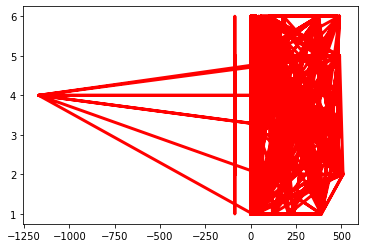

In [13]:
plt.plot(Test_x, Model.predict(Test_x), color='red',linewidth=3)


In [14]:
Pred_y= Model.predict(Test_x)
r2_score(Test_y, Pred_y)

0.8556942165621202

In [15]:
print(Pred_y)


[5 2 5 2 6 5 2 2 2 1 5 6 4 1 5 1 1 3 1 5 6 5 6 6 2 1 1 6 3 1 5 1 4 2 6 5 2
 2 6 6 6 6 3 6 2 3 3 4 3 1 3 2 3 2 6 4 2 1 2 5 5 5 5 6 1 3 2 5 2 4 6 3 5 2
 5 6 5 1 3 6 1 3 6 6 3 1 1 6 5 1 4 2 5 5 2 2 5 3 1 1 6 5 6 5 2 1 1 3 6 6 4
 5 5 6 4 3 1 1 5 6 5 1 4 6 1 6 1 4 2 5 5 3 1 1 1 6 6 1 2 6 5 5 4 5 6 6 4 5
 1 5 2 1 5 2 3 1 5 2 2 5 2 3 1 6 1 3 1 1 5 2 1 3 2 2 6 3 5 5 2 5 2 1 3 6 4
 1 6 1 4 6 6 3 6 1 6 3 5 3 6 3 5 5 5 1 3 5 2 2 4 3 3 4 2 5 1 1 2 2 1 4 3 4
 1 1 6 5 1 5 5 1 6 2 1 5 6 1 5 2 4 1 2 1 5 1 6 1 1 2 1 5 3 4 6 1 2 1 1 3 3
 4 1 1 4 2 4 3 3 2 4 3 4 2 5 6 3 6 5 2 1 6 4 1 6 2 1 3 3 1 6 5 4 4 4 4 4 5
 5 6 4 3 2 5 2 5 5 5 1 2 5 2 6 6 1 5 1 4 3 5 4 4 4 5 5 2]
